# ALGORITMO DE MACHINE LEARNING SUPERVISADO

## Regresión logística 

Nuestro objetivo es tratar de predecir en una base de datos estructurada una variable categórica binaria. Este algoritmo será supervisado ya que contaremos con los valores reales de la variable de interés, y por consiguiente un porcentaje de acierto del modelo.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Leeremos el dataframe que contiene edades de pacientes y si contraen o no una enfermedad

In [2]:
df = pd.read_csv("Libro1.csv",sep=';')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.shape #27 individuos

(27, 2)

In [4]:
df.describe() #maximo y minimo de edades

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


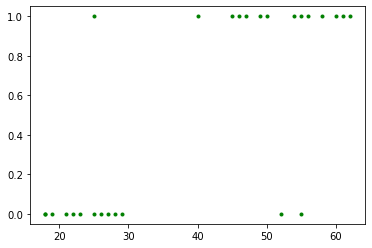

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='.',color='green') #dibujamos ambas variables

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8) #testearemos a posteriori 
#con el 20% de los datos

In [8]:
#documentación si fuera necesario help(train_test_split) 

In [9]:
X_test #testearemos con estos datos 

,age
20,21
4,46
25,54
18,19
7,60
8,62


In [10]:
y_test #valores reales de si se ha contraido la enfermedad o no para el grupo de testeo (X_test)

20    0
4     1
25    1
18    0
7     1
8     1
Name: bought_insurance, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_predicted = model.predict(X_test)

In [14]:
y_predicted  #Las predicciones de si se contrae la enfermedad o no en el grupo de testeo (X_test)

array([0, 1, 1, 0, 1, 1], dtype=int64)

In [15]:
model.predict_proba(X_test) #probabilidades de estar en la clase 0 o 1 (es decir de contraer no contraer la enfermedad o de si
#contraerla) para nuestro grupo de testeo

array([[0.90061175, 0.09938825],
       [0.32768042, 0.67231958],
       [0.16057307, 0.83942693],
       [0.91966908, 0.08033092],
       [0.08663539, 0.91336461],
       [0.06983377, 0.93016623]])

In [16]:
model.score(X_test,y_test) #porcentaje de acierto de nuestro modelo, vemos como da un valor erróneo al individuo que tiene edad
# 52

1.0

In [17]:
model.coef_, model.intercept_ #indican los coef en y=mx+b

(array([[0.11690942]]), array([-4.65913815]))

In [18]:
import math
def prediction_function(age):
    z = model.coef_ * age + model.intercept_ 
    y = 1/(1+math.exp(-z))
    return y

In [19]:
age = 35
prediction_function(age) #si el valor es superior a 0.5 se le asociaría el valor 1, es decir el individuo contrae la enfermedad

0.36185808681760223

In [20]:
import numpy as np

El modelo gráficamente

In [21]:
x1 = range(18,62)
y1=[]
for i in x1:
    y1.append(prediction_function(i))


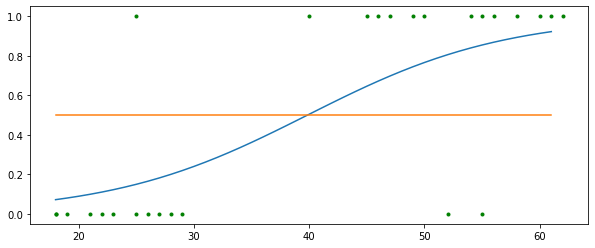

In [22]:
plt.figure(figsize=(10,4)) 
plt.scatter(df.age,df.bought_insurance,marker='.',color='green')
plt.plot(x1,y1)
plt.plot(x1,np.repeat(0.5,len(x1)))


In [23]:
data = {'Años':x1, 'Estimación':y1}
df2 = pd.DataFrame(data)
df2[19:21] #vemos como entre si se es menor o igual a 37 años, estaríamos clasificando al individuo como no enfermo, y de 38 en
#adelante como enfermo

,Años,Estimación
19,37,0.417392
20,38,0.446066
